In [1]:
import pandas as pd

# Load the merged dataset
data_path = "/Users/willwu/Documents/GitHub/Zooplankton/plankton_data/Merged_Master_CSV.csv"  # Update path if necessary
df = pd.read_csv(data_path)

# Display dataset info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (42087981, 53)


,tifffile,csvfile,Year,SAM,Month,Day,repnum,Loc,SITE,DOY,...,Sigma.Intensity,Roughness,Transparency,Image.File,Particle.ID,Image.Height,Image.Width,Image.X,Image.Y,Filename
0,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,66.7480,1.8286,0.3171,04072021_Huron_10_2mm_Rep2_AD_000002.tif,99,130,95,870,0,20210407_FISHI_010_2mm_Rep2_VC_data.csv
1,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,65.6102,1.4038,0.2648,04072021_Huron_10_2mm_Rep2_AD_000005.tif,415,111,99,596,380,20210407_FISHI_010_2mm_Rep2_VC_data.csv
2,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,67.8257,1.2653,0.3878,04072021_Huron_10_2mm_Rep2_AD_000010.tif,905,109,117,901,1105,20210407_FISHI_010_2mm_Rep2_VC_data.csv
3,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,40.7299,1.2742,0.2844,04072021_Huron_10_2mm_Rep2_AD_000019.tif,1649,97,72,1029,247,20210407_FISHI_010_2mm_Rep2_VC_data.csv
4,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,61.2308,1.3379,0.2839,04072021_Huron_10_2mm_Rep2_AD_000020.tif,1736,115,93,171,0,20210407_FISHI_010_2mm_Rep2_VC_data.csv


In [4]:
# Selecting the most relevant features
selected_features = [
    "Class",          # Target Variable
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "gdd2",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature (Chosen over Perimeter, Area)
]

df = df[selected_features]

# Display selected columns
print("Selected Features:", df.columns)
df.head()


Selected Features: Index(['Class', 'WaterT', 'AvgDepth', 'PRECIP', 'gdd2', 'Aspect.Ratio',
       'Circularity', 'Diameter..ABD.'],
      dtype='object')


,Class,WaterT,AvgDepth,PRECIP,gdd2,Aspect.Ratio,Circularity,Diameter..ABD.
0,Calanoid_1,6.4,2.95,0,33.395666,0.5811,0.1528,631.2654
1,Calanoid_1,6.4,2.95,0,33.395666,0.3893,0.3005,597.0144
2,Calanoid_1,6.4,2.95,0,33.395666,0.7033,0.2591,575.5905
3,Calanoid_1,6.4,2.95,0,33.395666,0.4261,0.3508,494.3373
4,Calanoid_1,6.4,2.95,0,33.395666,0.7508,0.3140,588.6588


Missing Values per Column:
 Class                   0
WaterT                  0
AvgDepth                0
PRECIP                  0
gdd2                    0
distshore         7816391
Aspect.Ratio            0
Circularity             0
Diameter..ABD.          0
dtype: int64


/var/folders/z1/m0zdhyss3_xcp1hpgzc17plh0000gn/T/ipykernel_24371/2589563188.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y='distshore', data=df, palette="Set2")


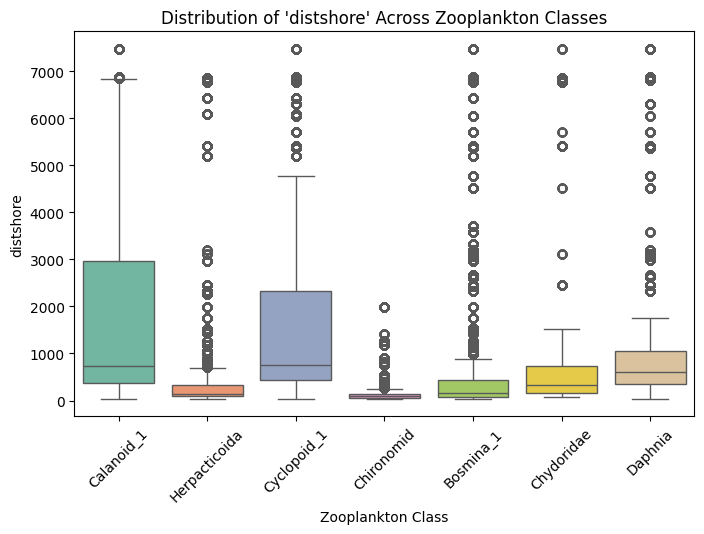

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check missing values in the dataset
print("Missing Values per Column:\n", df.isnull().sum())

df["Class"].value_counts()

df['distshore'].describe()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Class", y='distshore', data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title(f"Distribution of 'distshore' Across Zooplankton Classes")
plt.xlabel("Zooplankton Class")
plt.ylabel('distshore')
plt.show()


In [5]:
#Predict Missing Values Using Regression
from sklearn.linear_model import LinearRegression

# Select only rows where distshore is NOT missing
df_not_missing = df.dropna(subset=["distshore"])

# Train a simple regression model
X_train = df_not_missing[["AvgDepth"]]
y_train = df_not_missing["distshore"]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing values
missing_rows = df[df["distshore"].isnull()]
df.loc[df["distshore"].isnull(), "distshore"] = regressor.predict(missing_rows[["AvgDepth"]])


KeyError: ['distshore']

In [11]:
# Check again to ensure there are no missing values
print("Missing values after imputation:", df["distshore"].isnull().sum())

Missing values after imputation: 0


In [4]:
from imblearn.over_sampling import SMOTE

# Splitting features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

df["Class"].value_counts()

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Class"] = y_resampled

print("Balanced Dataset Shape:", df_resampled.shape)
df_resampled["Class"].value_counts()


: 